In [ ]:
! unzip "/content/ezyzip.zip"

Archive:  /content/ezyzip.zip
   creating: train/
   creating: train/tulsi/
  inflating: train/tulsi/5f357e7c1d110dfc407eb9ab6f256486.jpg  
  inflating: train/tulsi/basil.jpg   
  inflating: train/tulsi/benefits-of-tulsi-plant-at-home.jpg  
  inflating: train/tulsi/download.jpg  
  inflating: train/tulsi/GettyImages-1209478267-080254aa029a4b0bb353ca993d77da00 (1).jpg  
  inflating: train/tulsi/GettyImages-1209478267-080254aa029a4b0bb353ca993d77da00.jpg  
  inflating: train/tulsi/images (1).jpg  
  inflating: train/tulsi/images (2).jpg  
  inflating: train/tulsi/images (3).jpg  
  inflating: train/tulsi/images (4).jpg  
  inflating: train/tulsi/images.jpg  
  inflating: train/tulsi/istockphoto-1205554102-1024x1024.jpg  
  inflating: train/tulsi/Krishna-Tulsi_Plant3-550x550.png  
  inflating: train/tulsi/organic-herbal-tulsi-plant-117.jpg  
  inflating: train/tulsi/tulsi-plant-500x500 (1).jpg  
  inflating: train/tulsi/tulsi.jpg   
  inflating: train/tulsi/tulsi1.jpg  
  inflating: train

In [ ]:
train_dir="/content/train"
test_dir="/content/test"

In [59]:
import pandas as pd
import glob as gb
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from IPython.display import clear_output
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
plant_type=os.listdir(train_dir)
p=len(plant_type)
print("Number of plant types:",p)

Number of plant types: 5


In [ ]:
plant_test=os.listdir(test_dir)
q=len(plant_test)
print("Number of plant for test",q)


Number of plant for test 5


In [38]:
extensions = ['png', 'jpeg', 'jpg', 'webp']
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    image_files = []
    for ext in extensions:
        image_files.extend(gb.glob(os.path.join(folder_path, f'*.{ext}')))
    print(f"For training data, found {len(image_files)} image files in folder {folder}")

For training data, found 17 image files in folder neem
For training data, found 19 image files in folder tulsi
For training data, found 18 image files in folder aloevara
For training data, found 45 image files in folder mango
For training data, found 11 image files in folder nagfani


In [36]:
extensions = ['png', 'jpeg', 'jpg', 'webp']
for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    image_files = []
    for ext in extensions:
        image_files.extend(gb.glob(os.path.join(folder_path, f'*.{ext}')))
    print(f"For testing data, found {len(image_files)} image files in folder {folder}")

For testing data, found 7 image files in folder neem
For testing data, found 10 image files in folder tulsi
For testing data, found 4 image files in folder aloevara
For testing data, found 12 image files in folder mango
For testing data, found 4 image files in folder nagfani


In [47]:
plants={}
train=test=0
for clss in plant_type:
  num=len(os.listdir (os.path.join(train_dir,clss))) 
  train+=num
  plants[clss]=num

In [48]:
plants

{'neem': 17, 'tulsi': 19, 'aloevara': 18, 'mango': 45, 'nagfani': 11}

In [71]:
import cv2
import os

# Path to the directory containing the images
image_directory = "/content/train"

# Iterate through all subfolders in the directory
for folder in os.listdir(image_directory):
    folder_path = os.path.join(image_directory, folder)
    
    # Iterate through all images in the subfolder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".webp"):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)
            
            # Resize the image to 64x64 pixels
            resized_img = cv2.resize(img, (64, 64))
            
            # Save the resized image
            cv2.imwrite(image_path, resized_img)

In [66]:
def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    

In [72]:
import cv2
import os

# Path to the directory containing the images
image_directory = "/content/train"

# Iterate through all subfolders in the directory
for folder in os.listdir(image_directory):
    folder_path = os.path.join(image_directory, folder)

    # Iterate through all images in the subfolder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)

            # Check the dimensions of the image
            height, width = img.shape[:2]
            print(f"Image: {filename}, Dimensions: {width}x{height}")

Image: 360_F_301562623_jCdJINOtqmV6YFGddbxHF4vuQOvcigHH.jpg, Dimensions: 64x64
Image: depositphotos_84014056-stock-photo-neem-leaves-azadirachta-indica.jpg, Dimensions: 64x64
Image: depositphotos_251587526-stock-photo-neem-tree-or-azadirachta-indica.jpg, Dimensions: 64x64
Image: neem2.jpg, Dimensions: 64x64
Image: images (2).jpg, Dimensions: 64x64
Image: images (3).jpg, Dimensions: 64x64
Image: images (4).jpg, Dimensions: 64x64
Image: 360_F_284788854_Kd1y1BpqmFx2xgWCZPKl17BBIfcGjj4u.jpg, Dimensions: 64x64
Image: images (5).jpg, Dimensions: 64x64
Image: images (1).jpg, Dimensions: 64x64
Image: neem1.jpg, Dimensions: 64x64
Image: 253-2537652_neem-leaves-neem-powder-for-hair-and-skin.png, Dimensions: 64x64
Image: fresh-neem-leaves-B45JDY.jpg, Dimensions: 64x64
Image: images.jpg, Dimensions: 64x64
Image: neem 3.jpg, Dimensions: 64x64
Image: tulsi-plant-500x500 (1).jpg, Dimensions: 64x64
Image: istockphoto-1205554102-1024x1024.jpg, Dimensions: 64x64
Image: tulsi2.jpg, Dimensions: 64x64
Imag

In [73]:
plant_names = ['neem', 'tulsi', 'aloevara', 'mango', 'nagfani']

Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)
Image shape (64, 64, 3)


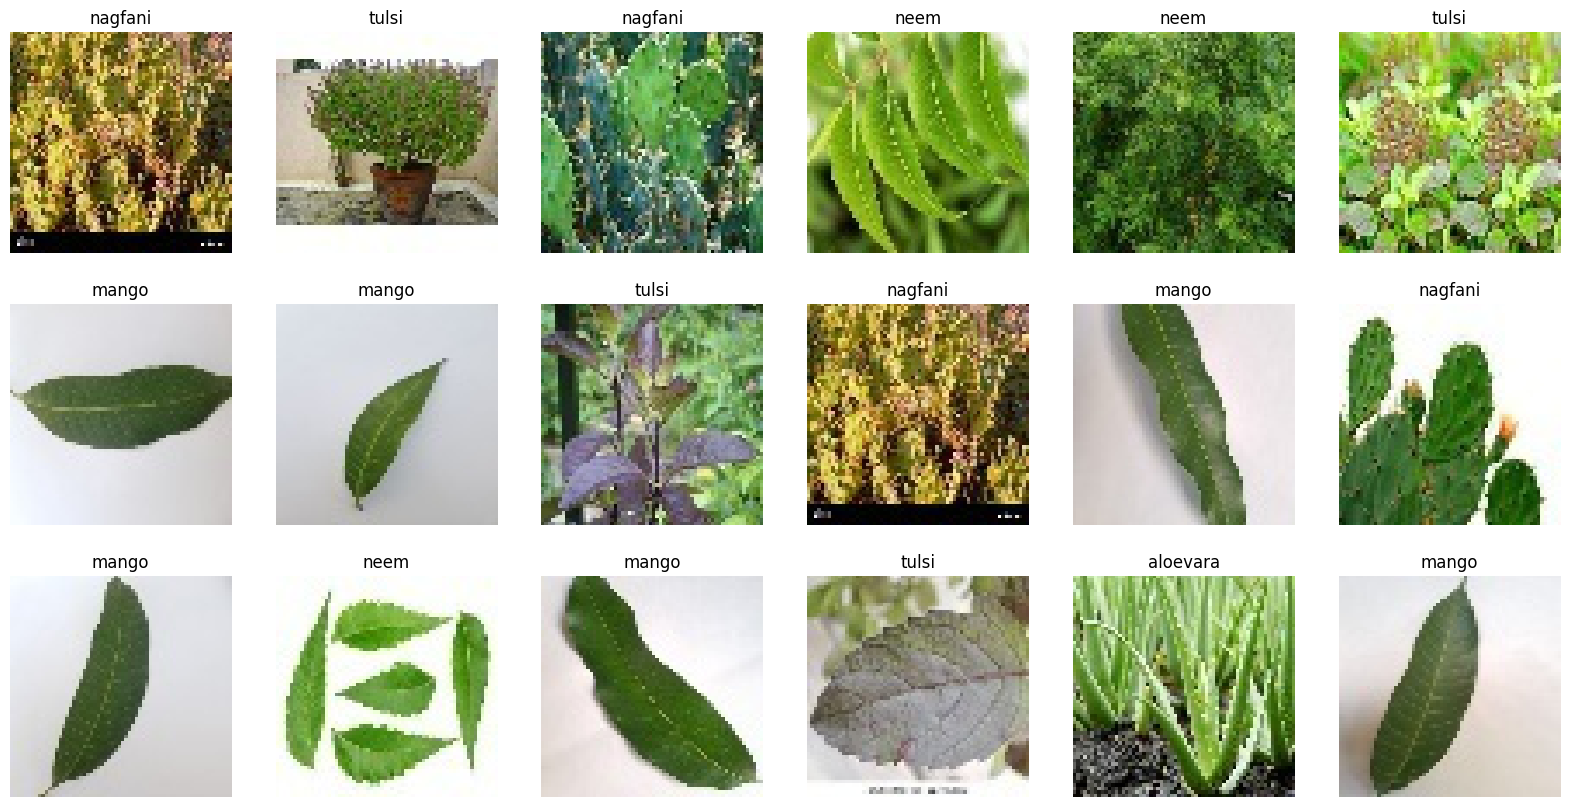

In [74]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(plant_names)
    img = view_random_image(target_dir="/content/train/", target_class=class_name)

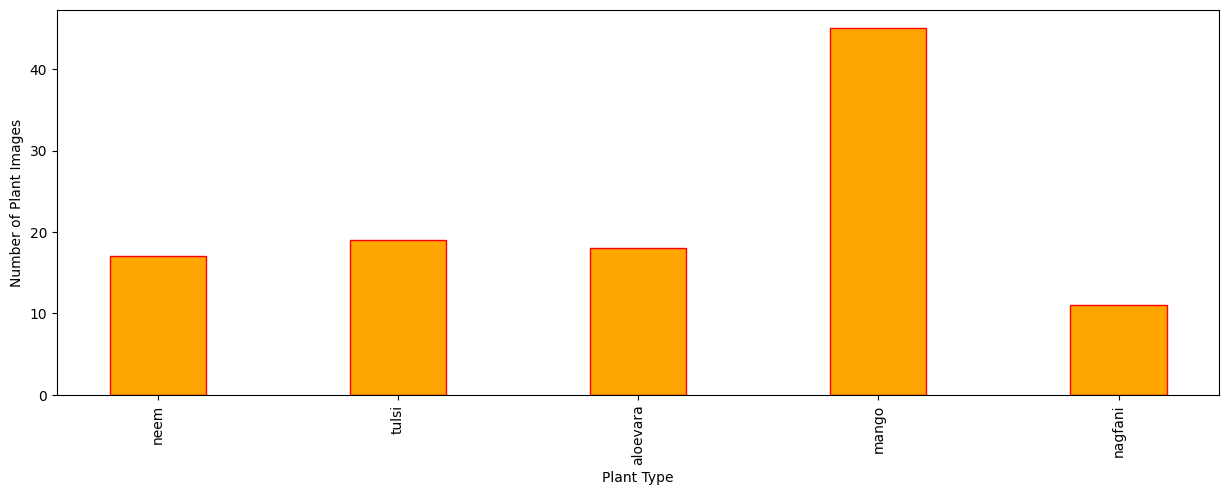

In [80]:
plt.figure(figsize=(15,5))
plt.bar(list(plants.keys()), list(plants.values()), width=0.4, align="center", edgecolor=["red"],color=['orange']) 
plt.xticks(rotation=90)
plt.xlabel("Plant Type")
plt.ylabel("Number of Plant Images") 
plt.show()

In [81]:
SEED=12
BATCH_SIZE=12
IMG_SHAPE=(64,64)

In [82]:
train_set=image_dataset_from_directory( 
    train_dir, 
    label_mode="categorical",
    batch_size=BATCH_SIZE, 
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=SEED,
    validation_split=0.2, 
    subset="training", )

Found 105 files belonging to 5 classes.
Using 84 files for training.


In [83]:
val_set=image_dataset_from_directory( train_dir, 
                                       label_mode="categorical",
                                       batch_size=BATCH_SIZE, 
                                       image_size=IMG_SHAPE,
                                       shuffle=True,
                                       seed=SEED,
                                       validation_split=0.2, 
                                       subset="validation", )

Found 105 files belonging to 5 classes.
Using 21 files for validation.


In [84]:
test_set=image_dataset_from_directory( 
    test_dir, 
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE, 
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=SEED, )

Found 32 files belonging to 5 classes.


In [100]:
def transfer_learning():
  base_model=DenseNet121(include_top=False, input_shape = (64,64,3) , weights="imagenet")

  thr=100
  for layers in base_model.layers[:thr]: 
    layers.trainable=False

  for layers in base_model.layers[thr:]:
     layers.trainable=False
  return base_model

In [101]:
def create_model():
  model=Sequential()
  base_model=transfer_learning()
  model.add(base_model)
  model.add(GlobalAveragePooling2D())
  model.add(Dense (64, activation="relu"))
  model.add(Dropout (0.2))
  model.add(Dense (32, activation="relu"))
  model.add(Dropout (0.2))
  model.add(Dense (5,activation="softmax"))
  model.summary()
  return model

In [102]:
model=create_model()
model.compile(optimizer="adam",loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d_4   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 64)                65600     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                      

In [104]:
history = model.fit(x=train_set, validation_data=val_set, epochs=20)

Epoch 1/20
7/7 [==============================] - 2s 245ms/step - loss: 1.5339 - accuracy: 0.6310 - val_loss: 1.5650 - val_accuracy: 0.5238
Epoch 2/20
7/7 [==============================] - 2s 221ms/step - loss: 1.1641 - accuracy: 0.7024 - val_loss: 1.4591 - val_accuracy: 0.5238
Epoch 3/20
7/7 [==============================] - 2s 218ms/step - loss: 1.1495 - accuracy: 0.7024 - val_loss: 1.4401 - val_accuracy: 0.4762
Epoch 4/20
7/7 [==============================] - 2s 275ms/step - loss: 0.8229 - accuracy: 0.7500 - val_loss: 1.1571 - val_accuracy: 0.4762
Epoch 5/20
7/7 [==============================] - 1s 212ms/step - loss: 0.8587 - accuracy: 0.7619 - val_loss: 1.2622 - val_accuracy: 0.4762
Epoch 6/20
7/7 [==============================] - 2s 318ms/step - loss: 0.7449 - accuracy: 0.7500 - val_loss: 1.3214 - val_accuracy: 0.5238
Epoch 7/20
7/7 [==============================] - 2s 329ms/step - loss: 0.4794 - accuracy: 0.7976 - val_loss: 1.4585 - val_accuracy: 0.5238
Epoch 8/20
7/7 [====

In [105]:
model.save('plant.h5')

In [109]:
from tensorflow.keras.models import load_model
model.load_weights('plant.h5')

In [111]:
y_true = np.array([])
for x,y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=1)])

In [112]:
y_pred=model.predict(test_set)

3/3 [==============================] - 3s 135ms/step


In [113]:
y_pred

array([[2.5268057e-02, 8.8248489e-04, 9.6797216e-01, 5.7867351e-03,
        9.0450121e-05],
       [6.3269794e-01, 2.2965731e-02, 1.2293125e-02, 3.0035993e-01,
        3.1683356e-02],
       [5.1371591e-13, 9.9999994e-01, 1.2272718e-19, 5.0801595e-16,
        2.9827923e-10],
       [6.7377229e-08, 9.9999982e-01, 1.7500086e-13, 4.9958860e-13,
        2.5445159e-08],
       [1.0581737e-09, 9.9999994e-01, 7.3590859e-18, 3.5444230e-18,
        2.8674182e-10],
       [1.2019935e-10, 9.9999994e-01, 5.6405401e-16, 8.0142989e-13,
        1.5490536e-09],
       [2.5878213e-09, 9.9999994e-01, 5.6853272e-14, 4.4299677e-14,
        2.0278684e-08],
       [2.3220795e-10, 9.9999994e-01, 5.2496230e-17, 3.6122428e-14,
        9.1821679e-09],
       [3.0568854e-09, 1.0000000e+00, 1.6430612e-11, 4.9343155e-12,
        8.2911389e-10],
       [5.4369043e-09, 1.0000000e+00, 7.8269571e-14, 1.5115241e-11,
        2.8809291e-08],
       [6.4496368e-07, 9.9999940e-01, 8.1177003e-15, 2.2394781e-12,
        3.17

In [114]:
y_true

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [119]:
# Testing 1

img  = image.load_img("/content/test/aloevara/1.webp", target_size=(64,64)) # Reading image
x= image.img_to_array(img)# Converting image into array
x= np.expand_dims (x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ["aloevara","mango","nagfani","neem","tulsi"]
op[pred] # List indexing with output

1/1 [==============================] - 0s 58ms/step


'aloevara'

In [117]:
# Testing 2

img  = image.load_img("/content/test/mango/20211231_123105 (Custom).jpg", target_size=(64,64)) # Reading image
x= image.img_to_array(img)# Converting image into array
x= np.expand_dims (x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ["aloevara","mango","nagfani","neem","tulsi"]
op[pred] # List indexing with output

1/1 [==============================] - 0s 55ms/step


'mango'

In [123]:
# Testing 3

img  = image.load_img("/content/test/neem/neem2.jpg", target_size=(64,64)) # Reading image
x= image.img_to_array(img)# Converting image into array
x= np.expand_dims (x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ["aloevara","mango","nagfani","neem","tulsi"]
op[pred] # List indexing with output

1/1 [==============================] - 0s 48ms/step


'neem'

In [124]:
# Testing 4

img  = image.load_img("/content/test/tulsi/tulsi-plant-500x500 (1).jpg", target_size=(64,64)) # Reading image
x= image.img_to_array(img)# Converting image into array
x= np.expand_dims (x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ["aloevara","mango","nagfani","neem","tulsi"]
op[pred] # List indexing with output

1/1 [==============================] - 0s 84ms/step


'tulsi'

In [125]:
# Testing 5

img  = image.load_img("/content/test/tulsi/tulsi2.jpg", target_size=(64,64)) # Reading image
x= image.img_to_array(img)# Converting image into array
x= np.expand_dims (x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ["aloevara","mango","nagfani","neem","tulsi"]
op[pred] # List indexing with output

1/1 [==============================] - 0s 99ms/step


'tulsi'